In [1]:
# Import the packages required
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
# load the data from the datasets available in scikit learn
dataset = datasets.load_breast_cancer()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [3]:
# print the data structure information
print(dataset.keys())
print(dataset.data.shape)
print(dataset.feature_names)
print(dataset.target_names)
print(dataset.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from ce

In [4]:
# Define the algorithm to be used
alg = DecisionTreeClassifier(max_depth=3)

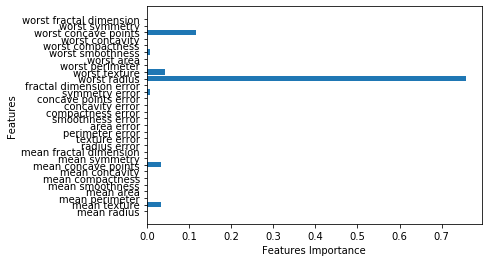

In [5]:
# Graph the importance of the features in the prediction
alg.fit(dataset.data, dataset.target)
features = dataset.data.shape[1]
plt.barh(range(features), alg.feature_importances_)
plt.yticks(np.arange(features), dataset.feature_names)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.show()

In [6]:
# select the x and y data
x = dataset.data[:, np.newaxis, 20]
y = dataset.target
print(x.shape, y.shape)
print(x[0], y[0])

(569, 1) (569,)
[25.38] 0


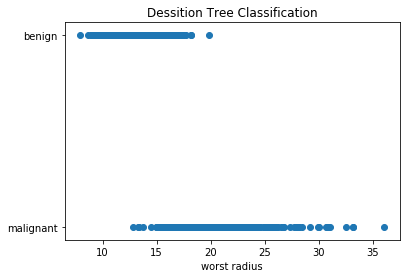

In [7]:
# plot the information
legend = dataset.feature_names[20]
categories = dataset.target_names
y_cat = [categories[i] for i in y]

plt.scatter(x, y_cat)
plt.title('Dessition Tree Classification')
plt.xlabel(legend)
plt.show()

In [8]:
# Split the dataset in training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 1) (455,)
(114, 1) (114,)


In [9]:
# Fit the model using the algorithm
alg.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

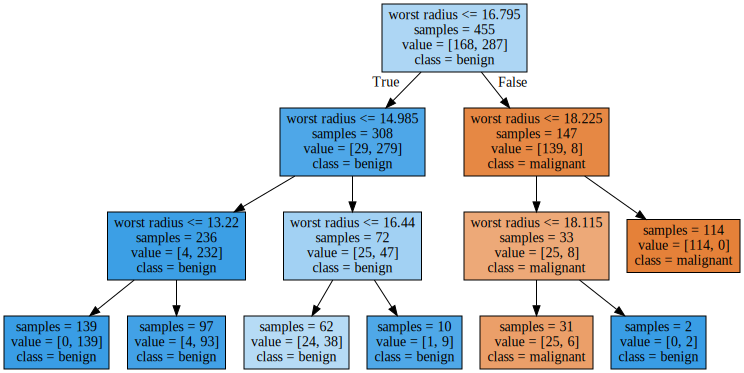

In [10]:
# Graph the Dessition Tree
treefile = '../../data/tree.dot'
export_graphviz(alg, out_file=treefile, class_names=categories, feature_names=[legend], impurity=False, filled=True)
graphviz.Source.from_file(treefile)

In [11]:
# Generate a prediction over the test data using the model
y_pred = alg.predict(x_test)
print(y_pred.shape)
print(y_pred[:10])
print(y_test[:10])

(114,)
[1 0 0 1 1 1 0 1 0 0]
[0 0 0 1 1 1 0 1 0 0]


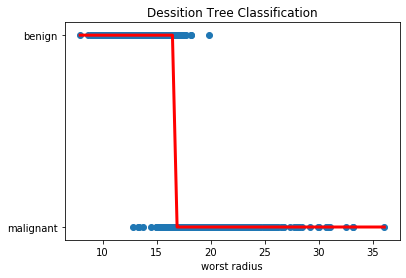

In [12]:
# Graph the test data with the model line
y_pred_cat = [categories[i] for i in y_pred]
data_test = sorted(zip(x_test, y_pred), key = lambda i : i[0])

plt.scatter(x, y_cat)
plt.plot([i[0] for i in data_test], [i[1] for i in data_test], color='red', linewidth=3)
plt.title('Dessition Tree Classification')
plt.xlabel(legend)
plt.show()

In [13]:
# Validate, using the confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[40  4]
 [ 3 67]]


In [14]:
# Verify the model error based on R²
print('certainty:', alg.score(x_train, y_train) * 100, '%')
print('certainty:', alg.score(x_test, y_test) * 100, '%')

certainty: 92.3076923076923 %
certainty: 93.85964912280701 %
